In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, exp, log
from typing import Callable

# Exercise 1
### Generalisation Bound: $4m_H(2N) e^{-\epsilon^2 N / 8}$
### a) Complete generalisation_bound() by converting the function into code
### b) Plot the generalisation bound that you got acquainted with in the lecture by inserting a fitting growth function.

In [2]:
def generalisation_bound(growth_function : Callable[[int],int], accuracy : float = 0.01, n : int = 2000000):
    plots = np.empty((0,))
    i = 1
    while i < n:
        i = i + 1000
        plots = np.append(plots, 4*growth_function(2*i)*exp((-accuracy*accuracy)*i/8))
    return normalize(plots)

def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [3]:
def growth_function(n : int) -> int:
    return n+1

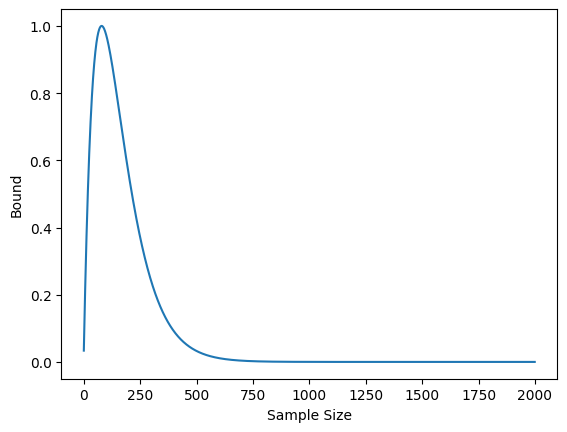

In [ ]:
### PLOT Code
plt.plot(generalisation_bound(growth_function))
plt.xlabel("Sample Size")
plt.ylabel("Bound")
plt.show()

# Exercise 2
### You are given 2 different models: A regression model and a classifier model.

### a) Run the models with increasingly larger test samples. (N=100 -> N=1000 -> N=100000 -> no limit)

In [5]:
from easy_models import EasyRegressionModel, EasyNNClassifierModel
easy_reg = EasyRegressionModel("age_income_years_worked.csv")
easy_class= EasyNNClassifierModel("age_income_years_worked.csv")

ModuleNotFoundError: No module named 'pandas'

In [ ]:
##Regression
#Use limit_test(N) to limit the test sample size max.20000
#Use predict()
#Use plot() to plot the regression
#Use calculate_mse() to get the trained and tested mean square errors
#For troubleshooting reasons we recommend rerunning the cell above.

#Your Code here

In [ ]:
## Classifier
#Use limit_test(N) to limit the test sample size max.20000
#Use train() to train the model
#Use calculate_error_ratio()
#For troubleshooting reasons we recommend rerunning the first cell of this exercise.

#Your Code here

### b) Take note of the change in accuracy of the models.

The error ratio for foreign data decreases with increasing sample size.

# Exercise 3
## $$ E_{out}(h) \leq E_{in}(h) + \sqrt{\frac{8}{N} \log \frac{4 m_H(2N)}{\delta}} $$

### Find an n for which $E_{out}$ is within 10%, 5% and 1% of $E_{in}$ with the provided growth function. Assume that $E_{in}$ has a probability of 3%.
### The provided growth_function : 3x³ + 2x² + 4


In [ ]:
# Your Code here

# Exercise 4
### Calculate a confusion matrix for the classifier that you've used in exercise 2.

In [ ]:
# Your Code here
# Use predict_test() for predicted values and actual values

# Exercise 5
### Research characteristic traits of the different Machine Learning concepts mentioned in the lecture.

# Exercise 6
### a) Note down 3 different everyday examples of "AI" and assign them to a node of the graph from the lecture.
### b) Also note down the kind of input data.